# Detecting Breast Cancer tissues using CNN, Large Data

We are using tensorflow keras for constructing a CNN for image inputs

Importing all keras packages

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
import numpy as np

Using TensorFlow backend.


# Preprocessing
# Defining testing and validation image sizes

In [2]:
num_train_samples = 141814
num_val_samples = 15758
train_batch_size = 10
val_batch_size = 10

The number of steps is calculated by dividing all number of samples by batch size

In [3]:
train_steps = np.ceil(num_train_samples / train_batch_size)
valid_steps = np.ceil(num_val_samples / val_batch_size)

Scaling the image using ImageDataGenerator and loading testing and validation sets

In [4]:
data_generator = ImageDataGenerator(rescale=1.0/255)

train_set = data_generator.flow_from_directory('base_dir/training_set',
                                        target_size=(50, 50),
                                        batch_size=train_batch_size,
                                        class_mode='categorical')

validation_set = data_generator.flow_from_directory('base_dir/test_set',
                                      target_size=(50, 50),
                                      batch_size=val_batch_size,
                                      class_mode='categorical')

test_set = data_generator.flow_from_directory('base_dir/test_set',
                                      target_size=(50, 50),
                                      batch_size=1,
                                      class_mode='categorical')

Found 141814 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.
Found 15758 images belonging to 2 classes.


Defining the kernel size and pooling size

In [5]:
kernel_size = (3, 3)
pool_size = (2, 2)

# Constructing a sequential CNN model with input layer

In [6]:
cnn_classifier = Sequential()
cnn_classifier.add(Conv2D(32, kernel_size, activation='relu', input_shape=(50, 50, 3)))
cnn_classifier.add(Conv2D(32, kernel_size, activation='relu'))
cnn_classifier.add(Conv2D(32, kernel_size, activation='relu'))
cnn_classifier.add(MaxPooling2D(pool_size=pool_size))
cnn_classifier.add(Dropout(0.3))

Constructing second convolutional layer

In [7]:
cnn_classifier.add(Conv2D(64, kernel_size, activation='relu'))
cnn_classifier.add(Conv2D(64, kernel_size, activation='relu'))
cnn_classifier.add(Conv2D(64, kernel_size, activation='relu'))
cnn_classifier.add(MaxPooling2D(pool_size=pool_size))
cnn_classifier.add(Dropout(0.3))

Constructing third convolutional layer

In [8]:
cnn_classifier.add(Conv2D(128, kernel_size, activation='relu'))
cnn_classifier.add(Conv2D(128, kernel_size, activation='relu'))
cnn_classifier.add(Conv2D(128, kernel_size, activation='relu'))
cnn_classifier.add(MaxPooling2D(pool_size=pool_size))
cnn_classifier.add(Dropout(0.3))

Constructing fully connected layer

In [9]:
cnn_classifier.add(Flatten())
cnn_classifier.add(Dense(256, activation="relu"))
cnn_classifier.add(Dropout(0.3))
cnn_classifier.add(Dense(2, activation="softmax"))

Printing summary of the model

In [10]:
cnn_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 64)       

Compiling the CNN model with optimizer

In [11]:
cnn_classifier.compile(Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model

In [14]:
cnn_classifierfit = cnn_classifier.fit_generator(train_set,
                                    steps_per_epoch=train_steps,
                                    validation_data=test_set,
                                    validation_steps=valid_steps,
                                    epochs=60,
                                    verbose=1)

Epoch 1/60
14182/14182 [==============================] - 208s 15ms/step - loss: 0.4583 - accuracy: 0.7944 - val_loss: 0.1227 - val_accuracy: 0.8173
Epoch 2/60
14182/14182 [==============================] - 157s 11ms/step - loss: 0.4000 - accuracy: 0.8272 - val_loss: 0.6016 - val_accuracy: 0.8464
Epoch 3/60
14182/14182 [==============================] - 161s 11ms/step - loss: 0.3790 - accuracy: 0.8395 - val_loss: 0.1217 - val_accuracy: 0.8560
Epoch 4/60
14182/14182 [==============================] - 158s 11ms/step - loss: 0.3638 - accuracy: 0.8466 - val_loss: 0.0436 - val_accuracy: 0.8541
Epoch 5/60
14182/14182 [==============================] - 159s 11ms/step - loss: 0.3530 - accuracy: 0.8521 - val_loss: 0.2060 - val_accuracy: 0.8629
Epoch 6/60
14182/14182 [==============================] - 158s 11ms/step - loss: 0.3451 - accuracy: 0.8554 - val_loss: 0.0425 - val_accuracy: 0.8192
Epoch 7/60
14182/14182 [==============================] - 156s 11ms/step - loss: 0.3385 - accuracy: 0.8591

In [15]:
print(cnn_classifierfit.history.keys())

dict_keys(['val_accuracy', 'accuracy', 'loss', 'val_loss'])


# Evaluating the accuracy of fit

In [16]:
import matplotlib.pyplot as plt

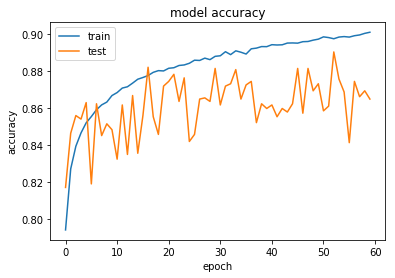

In [17]:
# summarize history for accuracy

plt.plot(cnn_classifierfit.history['accuracy'])
plt.plot(cnn_classifierfit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

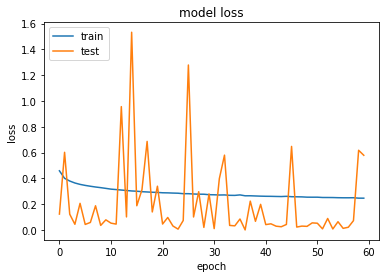

In [18]:
# summarize history for loss
plt.plot(cnn_classifierfit.history['loss'])
plt.plot(cnn_classifierfit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
cnn_classifier.save('cnn_bc_model_final', overwrite=True, include_optimizer=True)

In [20]:
import pandas as pd
dataset = pd.read_csv('bc_data.csv')

In [21]:
y_target = dataset['target']

In [22]:
from sklearn.model_selection import train_test_split
dataset_train, dataset_test = train_test_split(dataset, test_size=0.1, random_state=101, stratify=y_target)

In [23]:
print(dataset_train.shape)
print(dataset_test.shape)

(141814, 3)
(15758, 3)


# Prediction 

In [25]:
predictions = cnn_classifier.predict_generator(test_set, steps=len(dataset_test), verbose=1)

predictions.shape

15758/15758 [==============================] - 29s 2ms/step


(15758, 2)

In [26]:
dataset_prediction = pd.DataFrame(predictions, columns=['no_idc', 'has_idc'])

In [27]:
dataset_prediction.head()

no_idc   has_idc
0  0.921445  0.078555
1  0.753838  0.246162
2  0.123055  0.876945
3  0.704263  0.295737
4  0.479431  0.520569

In [29]:
y_true = test_set.classes
y_pred = dataset_prediction['has_idc']

# ROC Score

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_pred)

0.49638757394834077

# Function for plotting confusion matrix in GUI

In [31]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    from itertools import product
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [33]:
test_label = test_set.classes
test_label.shape

(15758,)

# Classification Report and confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_bin = predictions.argmax(axis=1)
cm = confusion_matrix(test_label, y_pred_bin)

In [35]:
cf = classification_report(y_true, y_pred_bin)

Confusion matrix, without normalization
[[3827 4052]
 [3793 4086]]


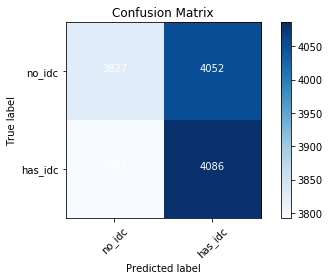

In [36]:
cm_plots = ['no_idc', 'has_idc']
plot_confusion_matrix(cm, cm_plots,title='Confusion Matrix')

In [37]:
dataset_prediction.to_csv('bc_prediction_model1.csv', encoding='utf-8')